In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np

file_name = 'training_log.txt'
data = []
pattern = '\[|/'
c = 0
with open(file_name) as file:
    for line in file:
        if line != '\n':
            epoch, step, loss, perplexity = line.split(',')
            epoch = int(re.split(pattern, epoch)[1])
            step = int(re.split(pattern, step)[1])
            loss = float(loss.split(':')[1].strip())
            while epoch >= len(data):
                data.append([])
            data[epoch-1].append(loss)

flatten_data = []
for epoch in data:
    for loss in epoch:
        flatten_data.append(loss)

Text(0, 0.5, 'Loss')

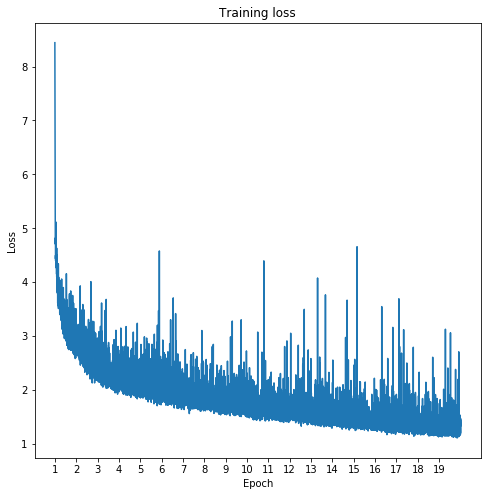

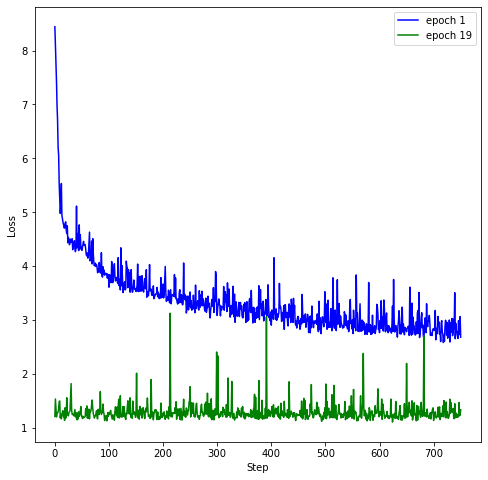

In [3]:
fig, axes1 = plt.subplots(figsize=(8, 8))        
axes1.plot(flatten_data)
axes1.set_title('Training loss')
n = len(data)-1
xtick_label = [str(i) for i in range(1, n+1)]
plt.xticks(np.arange(0, n*751, step=751), xtick_label)
plt.xlabel('Epoch')
plt.ylabel('Loss')

fig, axes2 = plt.subplots(figsize=(8, 8))        
plt.plot(range(len(data[0])), data[0], 'b-', label='epoch 1')
plt.plot(range(len(data[n-1])), data[n-1], 'g-', label='epoch ' + str(n))
plt.legend(['epoch 1', 'epoch ' + str(n)])
# plt.set_title('Training loss of epoch 1 and 7')
plt.xlabel('Step')
plt.ylabel('Loss')

# fig, axes3 = plt.subplots(figsize=(8, 8))        
# axes3.plot(data[6])
# axes3.set_title('Training loss of epoch 7')
# plt.xlabel('Step')
# plt.ylabel('Loss')
